In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## 2-2
#### Visualizing Businesss Review Counts in the Yelp dataset

In [14]:
biz_df = pd.read_csv('C:\\Users\\ajens\\OneDrive\\Documents\\Personal\\A.Jensen MDS\\Yelp Reviews - 10000(1).csv')

In [15]:
biz_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_count
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,8
1,ZRJwVLyzEJq1VAihDhYiow,7/27/2011,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,6
2,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,12
3,_1QQZuf4zZOyFCvXc0o6Vg,5/27/2010,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,8
4,6ozycU1RpktNG2-1BroVtw,1/5/2012,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,1


In [16]:
biz_df2 = biz_df.groupby(['business_id'])['review_id'].count().reset_index()
biz_df2.rename(columns= {'review_id' : 'review_count'}, inplace = True)
biz_df2.head()

,business_id,review_count
0,#NAME?,176
1,-0QBrNvhrPQCaeo7mTo0zQ,1
2,-0bUDim5OGuv8R0Qqq6J4A,1
3,-1N0Z3uM8xbxKS8XiAnaog,1
4,-34jE_5dujSWMIOBudQsiQ,1


Text(0, 0.5, 'Occurances')

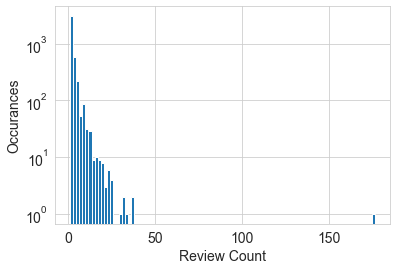

In [23]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df2['review_count'].hist(ax=ax, bins = 100)

ax.set_yscale('log')
ax.tick_params(labelsize = 14)
ax.set_xlabel('Review Count', fontsize = 14)
ax.set_ylabel('Occurances', fontsize = 14)

In [18]:
biz_df_graph = biz_df.merge(biz_df2, on = 'business_id')

In [19]:
biz_df_graph.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_count_x,review_count_y
0,9yKzy9PApeiPPOUJEtnvkg,1/26/2011,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,8,8
1,9yKzy9PApeiPPOUJEtnvkg,4/20/2011,4nvfVCoIDBhEiQdvXh1xoA,2,Finally was able to make it here for breakfast...,review,gXmtPKLWPZJeJX_KPw54HA,0,2,0,8,8
2,9yKzy9PApeiPPOUJEtnvkg,5/8/2012,VQqwoz4s-xYwGoqJDASTfg,2,:( I really wanted to like this place. I thoro...,review,BvjSQAFcROLp27QjaRcyoA,0,1,1,8,8
3,9yKzy9PApeiPPOUJEtnvkg,6/3/2012,PiR7lltpkA4GP8gAeCJYIg,4,"Loved the scenic restaurant, right in the midd...",review,5qa1hx5GVHehlBQx0b5gFw,0,0,0,8,8
4,9yKzy9PApeiPPOUJEtnvkg,11/4/2011,2Nci3cdKa0t32NeolLOfQA,5,Beautiful country setting in Phoenix on an old...,review,nprSBcvBhvzyIbacEwzDLQ,0,0,0,8,8


In [20]:
biz_df_graph[biz_df_graph['business_id'] == '6oRAC4uyJCsJl1X0WZpVSA'].iloc[0:2]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,review_count_x,review_count_y
14,6oRAC4uyJCsJl1X0WZpVSA,6/14/2012,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,12,12
15,6oRAC4uyJCsJl1X0WZpVSA,3/22/2012,6Gb_wp8N0TFXcYDkuRyWOQ,5,The best gyro you will have in Arizona...\nor ...,review,QUTW6GQnEAJSqrzoUJ0m7Q,0,0,0,12,12


Text(0, 0.5, 'Occurrence')

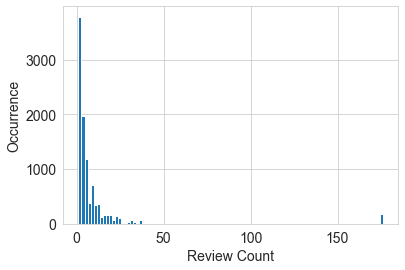

In [21]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df_graph['review_count_x'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## 2-3
#### Quantizing counts with fixed_width bins

In [32]:
small_counts = np.random.randint(0, 100, 20)
small_counts

array([92, 38, 81, 67, 86, 10, 73, 86, 83, 79, 20, 85, 54, 64, 90, 28,  6,
       97,  5, 80])

In [33]:
np.floor_divide(small_counts, 10)

array([9, 3, 8, 6, 8, 1, 7, 8, 8, 7, 2, 8, 5, 6, 9, 2, 0, 9, 0, 8],
      dtype=int32)

In [34]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]

In [35]:
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

## 2-4
#### Computing deciles of Yelp Business Review Counts

In [31]:
biz_df = biz_df_graph

In [29]:
deciles = biz_df['review_count_x'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     1.0
0.2     1.0
0.3     2.0
0.4     3.0
0.5     4.0
0.6     5.0
0.7     7.0
0.8     9.0
0.9    16.0
Name: review_count_x, dtype: float64

Text(0, 0.5, 'Occurrence')

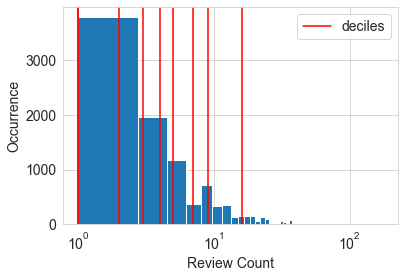

In [38]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count_x'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
#ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## 2-5
#### Binning counts by quantiles

In [39]:
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3], dtype=int64)

In [40]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 44, 28, 7971, 926, 122, 22222]
large_count_series = pd.Series(large_counts)
large_count_series.quantile([.25,.5,.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

## 2-6
#### Visualizing the distribution of review counts before and after log transformation

Text(0, 0.5, 'Occurrence')

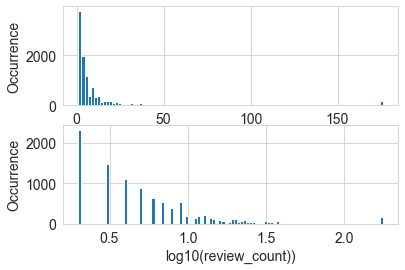

In [41]:
log_review_count = np.log10(biz_df['review_count_x'] + 1)

plt.figure()
ax = plt.subplot(2,1,1)
biz_df['review_count_x'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('review_count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

ax = plt.subplot(2,1,2)
log_review_count.hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('log10(review_count))', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

## 2-7
#### Visualizing the Distrbution of news article popularity with and without log transform

In [42]:
import os
os.getcwd()

'C:\\Users\\ajens\\Downloads'

In [44]:
df = pd.read_csv('C:\\Users\\ajens\\OneDrive\\Documents\\Personal\\A.Jensen MDS\\OnlineNewsPopularity.csv')

In [45]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [46]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [47]:
df['log_n_tokens_content'] = np.log10(df[' n_tokens_content'] + 1)

Text(0, 0.5, 'Number of Articles')

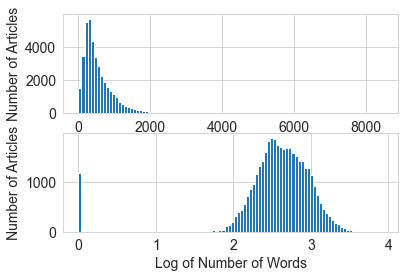

In [48]:
plt.figure()
ax = plt.subplot(2,1,1)
df[' n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Number of Words in Article', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

ax = plt.subplot(2,1,2)
df['log_n_tokens_content'].hist(ax=ax, bins=100)
ax.tick_params(labelsize=14)
ax.set_xlabel('Log of Number of Words', fontsize=14)
ax.set_ylabel('Number of Articles', fontsize=14)

## 2-8 
#### Using log transformed Yelp review counts to predict average business rating

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [50]:
biz_df['log_review_count'] = np.log10(biz_df['review_count_x'] + 1)

In [51]:
m_orig = LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count_x']], biz_df['stars'], cv=10)
m_log = LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)
print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.13331 (+/- 0.77459)
R-squared score with log transform: 0.00055 (+/- 0.02090)


## 2-9
#### Using log transformed word counts in the Online News Popularity dataset to predict article popularity

In [52]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


In [53]:
news_orig_model = LinearRegression()
scores_orig = cross_val_score(news_orig_model, df[[' n_tokens_content']], df[' shares'], cv=10)

news_log_model = LinearRegression()
scores_log = cross_val_score(news_log_model, df[['log_n_tokens_content']], df[' shares'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


## 2-10
#### Visualizing the correlation between input and output in the news populatiry prediction problem

Text(0, 0.5, 'Number of Shares')

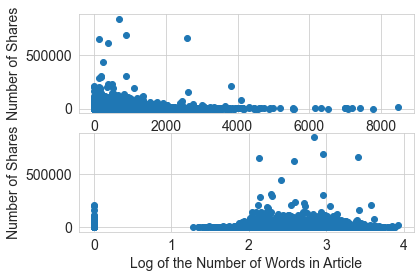

In [54]:
plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.scatter(df[' n_tokens_content'], df[' shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)
print(f'\n\n\n')

ax2 = plt.subplot(2,1,2)
ax2.scatter(df['log_n_tokens_content'], df[' shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)

## 2-11
#### Visualizing the correlation between input and output in Yelp business review prediction

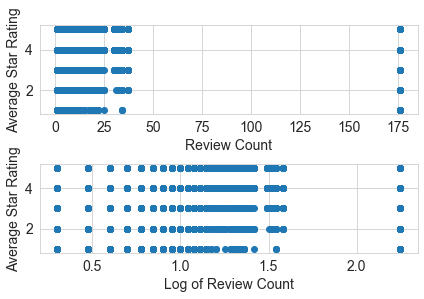

In [55]:
plt.figure()
ax1 = plt.subplot(2,1,1)
ax1.scatter(biz_df['review_count_x'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2 = plt.subplot(2,1,2)
ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

plt.tight_layout()

## 2-12
#### Box-Cox transformation of Yelp business review counts

In [56]:
from scipy import stats

In [57]:
biz_df['review_count_x'].min()

1

In [58]:
rc_log = stats.boxcox(biz_df['review_count_x'], lmbda=0)
rc_log = rc_log.tolist()

In [59]:
rc_bc, bc_params = stats.boxcox(biz_df['review_count_x'])
bc_params
rc_bc = rc_bc.tolist()

## 2-13
#### Visualizing the historgrams of original, log and Box-Cox transformed counts

In [62]:
biz_df['rc_bc'] = rc_bc
biz_df['rc_log'] = rc_log

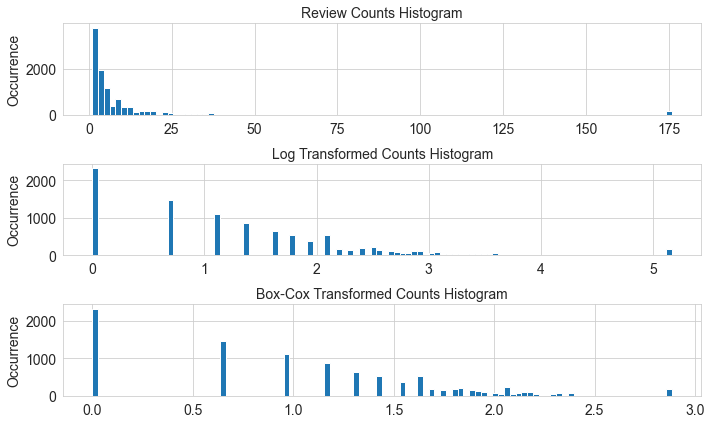

In [63]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize = (10,6))

# original review count histogram
biz_df['review_count_x'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_title('Review Counts Histogram', fontsize=14)
ax1.set_xlabel('')
ax1.set_ylabel('Occurrence', fontsize=14)

# review count after log transform
biz_df['rc_log'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_title('Log Transformed Counts Histogram', fontsize=14)
ax2.set_xlabel('')
ax2.set_ylabel('Occurrence', fontsize=14)

# review count after optimal Box-Cox transform
biz_df['rc_bc'].hist(ax=ax3, bins=100)
ax3.tick_params(labelsize=14)
ax3.set_title('Box-Cox Transformed Counts Histogram', fontsize=14)
ax3.set_xlabel('')
ax3.set_ylabel('Occurrence', fontsize=14)


plt.tight_layout()

## 2-14
#### Probability plots of original and transformed counts against the normal distribution

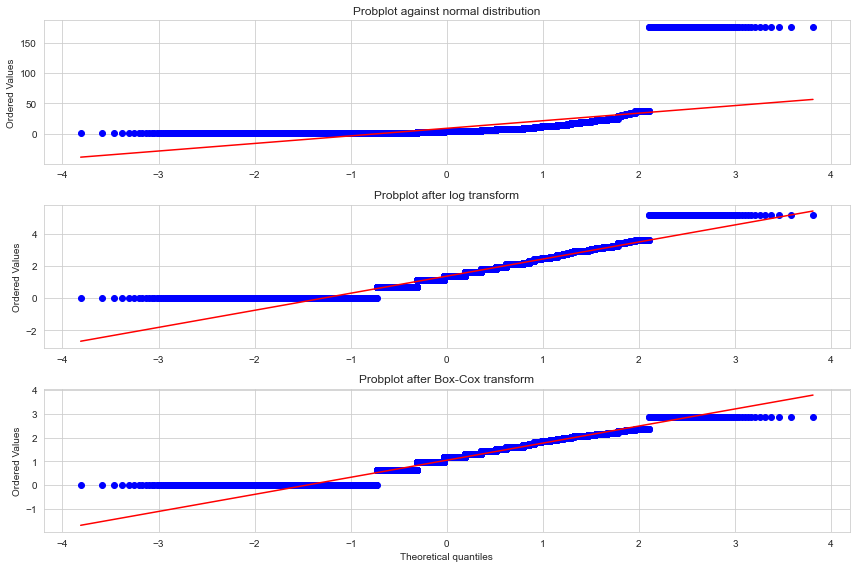

In [64]:
fig2, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,8))


prob1 = stats.probplot(biz_df['review_count_x'], dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

prob2 = stats.probplot(biz_df['rc_log'], dist=stats.norm, plot=ax2)
ax2.set_xlabel('')
ax2.set_title('Probplot after log transform')

prob3 = stats.probplot(biz_df['rc_bc'], dist=stats.norm, plot=ax3)
ax3.set_xlabel('Theoretical quantiles')
ax3.set_title('Probplot after Box-Cox transform')

plt.tight_layout()

## 2-17
#### Example of interaction features in predictions

In [65]:
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [66]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,log_n_tokens_content
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2.342423
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2.408240
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2.326336
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2.725912
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,3.030600


In [67]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [68]:
features = [' n_tokens_title', ' n_tokens_content',
            ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
            ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
            ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
            ' data_channel_is_entertainment', ' data_channel_is_bus',
            ' data_channel_is_socmed', ' data_channel_is_tech',
            ' data_channel_is_world']

In [69]:
X = df[features]

In [70]:
y = df[[' shares']]

In [71]:
X2 = sklearn.preprocessing.PolynomialFeatures(include_bias=False).fit_transform(X)
X2.shape

(39644, 170)

In [72]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(X, X2, y, 
                                                                         test_size=0.3,
                                                                         random_state=123)

In [73]:
def evaluate_feature(X_train, X_test, y_train, y_test):
    '''Fit a linear regression model on the training set and score on the test set'''
    model = LinearRegression().fit(X_train, y_train)
    r_score = model.score(X_test, y_test)
    return (model, r_score)

In [74]:
(m1, r1) = evaluate_feature(X1_train, X1_test, y_train, y_test)
(m2, r2) = evaluate_feature(X2_train, X2_test, y_train, y_test)

print("R-squared score with singleton features: %0.5f" % r1)
print("R-squared score with pairwise features: %0.10f" % r2)

R-squared score with singleton features: 0.00924
R-squared score with pairwise features: 0.0113159152
